In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Cargar datos
df_hombres = pd.read_csv("data/data_male.csv")
df_mujeres = pd.read_csv("data/data_female.csv")

# Agregar columna de género
df_hombres["Genero"] = "Hombre"
df_mujeres["Genero"] = "Mujer"

# Concatenar los datasets
df = pd.concat([df_hombres, df_mujeres], ignore_index=True)

# Convertir el género a número (0 = Hombre, 1 = Mujer)
df["Genero_Num"] = LabelEncoder().fit_transform(df["Genero"])

In [118]:
df

,FileName,text,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set,PodcastID,StratifyCol,NewPartition,PseudoEmo,InvEntropyNorm,PseudoEmoNum,Genero,Genero_Num
0,MSP-PODCAST_0288_0019,"mr. [excess 00:01:24] also known as ike, bbc r...",H,5.333333,5.416667,4.750000,123,Male,Train,288,0288_123_H,Train,H,1.000000,1,Hombre,0
1,MSP-PODCAST_3371_0004_0001,... i decided to take a trip to canada with my...,N,3.400000,4.800000,4.200000,1769,Male,Development,3371,3371_1769_N,Evaluation,N,1.000000,0,Hombre,0
2,MSP-PODCAST_0153_0436,"just clowning in the studio, people.",H,5.777778,5.111111,5.444444,15,Male,Train,153,0153_15_H,Evaluation,H,1.000000,1,Hombre,0
3,MSP-PODCAST_2979_0216,social distancing implies that we're being dis...,X,3.200000,4.000000,3.600000,1565,Male,Train,2979,2979_1565_X,Evaluation,N,0.246159,0,Hombre,0
4,MSP-PODCAST_0917_0196,... in 2016. we won. okay. and our core messag...,N,4.800000,3.600000,4.800000,266,Male,Train,917,0917_266_N,Train,N,1.000000,0,Hombre,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37418,MSP-PODCAST_4524_0125,a lot of resentment that i have seen in some c...,C,4.000000,2.800000,4.600000,1948,Female,Development,4524,4524_1948_C,Test,C,1.000000,4,Mujer,1
37419,MSP-PODCAST_2407_0219,"if this goes well, the goal that we are holdin...",N,3.400000,3.400000,3.600000,1353,Female,Train,2407,2407_1353_N,Train,N,1.000000,0,Mujer,1
37420,MSP-PODCAST_2422_0295,"he's cognizant, because he's so precision in h...",C,6.166667,1.833333,6.500000,1405,Female,Train,2422,2422_1405_C,Train,C,1.000000,4,Mujer,1
37421,MSP-PODCAST_5266_0250,"no, it's a clarity. so yeah, the energy.that-",H,5.400000,5.400000,4.600000,2819,Female,Train,5266,5266_2819_H,Test,H,1.000000,1,Mujer,1


In [119]:
# Seleccionar las variables para clustering
features = ["PseudoEmoNum"]
X = df[features].values

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

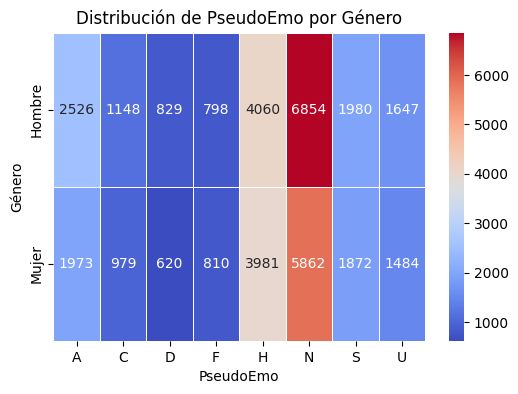

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear tabla de contingencia
contingency_table = pd.crosstab(df["Genero"], df["PseudoEmo"])

# Graficar la matriz de calor
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)

# Etiquetas y título
plt.xlabel("PseudoEmo")
plt.ylabel("Género")
plt.title("Distribución de PseudoEmo por Género")

plt.show()


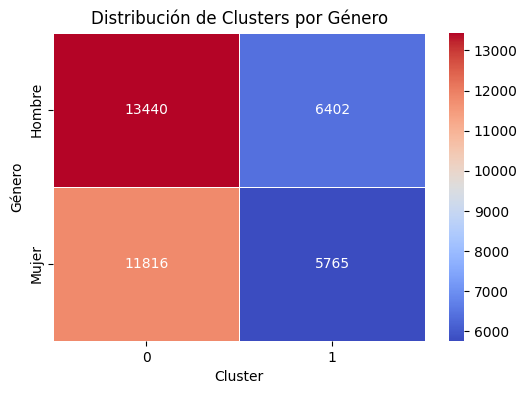

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear tabla de contingencia
contingency_table = pd.crosstab(df["Genero"], df["Cluster"])

# Graficar la matriz de calor
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)

# Etiquetas y título
plt.xlabel("Cluster")
plt.ylabel("Género")
plt.title("Distribución de Clusters por Género")

plt.show()



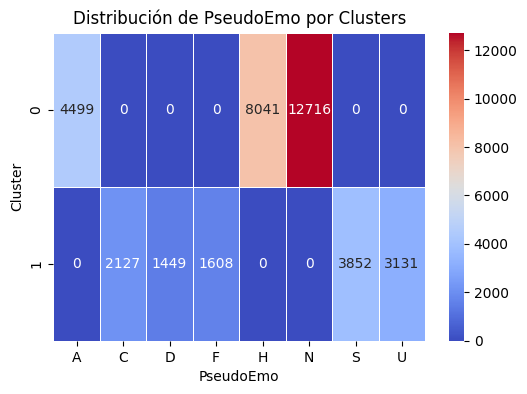

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear tabla de contingencia
contingency_table = pd.crosstab(df["Cluster"], df["PseudoEmo"])

# Graficar la matriz de calor
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)

# Etiquetas y título
plt.xlabel("PseudoEmo")
plt.ylabel("Cluster")
plt.title("Distribución de PseudoEmo por Clusters")

plt.show()


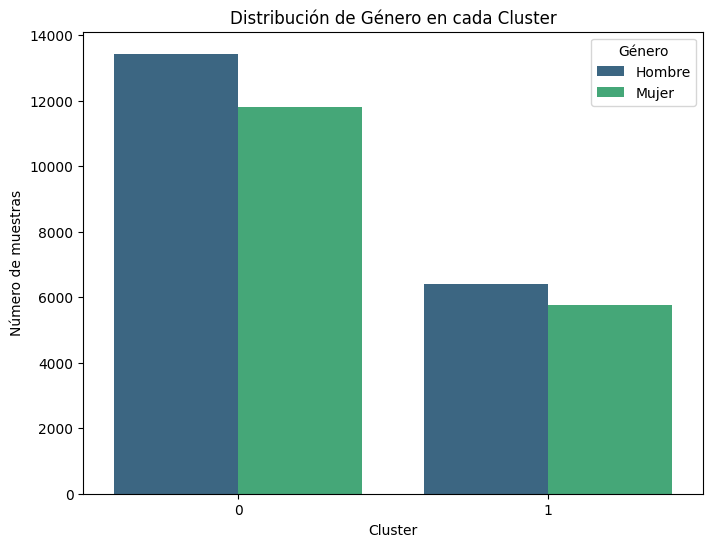

In [123]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Cluster"], hue=df["Genero"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Número de muestras")
plt.title("Distribución de Género en cada Cluster")
plt.legend(title="Género")
plt.show()
